In [18]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
import time

For simulating it when we're not connected:

In [19]:
from scipy.signal import sawtooth
N=500

def get_traces():
    time.sleep(0.1)
    t0 = np.random.random()*10
    t = np.linspace(0,15,N)
    x = sawtooth(t+t0,width=0.5)*3
    y = sawtooth(t+t0,width=0.5)*8
    x += np.random.normal(size=N)*0.2
    y += np.random.normal(size=N)*0.1
    return x,y,t

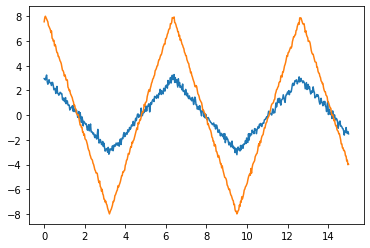

In [20]:
x,y,t = get_traces()
plt.plot(t,x)
plt.plot(t,y)

## A try with matplotlib notebook update


In [ ]:
%matplotlib inline

In [ ]:
%matplotlib notebook

In [ ]:
fig,ax = plt.subplots()
x,y,t = get_traces()
line1, = ax.plot(t,x)
line2, = ax.plot(t,y)
plt.ylabel('Voltage')
plt.xlabel('Time (seconds)')
plt.show()

while True:
    x,y,t = get_traces()
    line1.set_data(t,x)
    line2.set_data(t,y)
    fig.canvas.draw()

The matplotlib notebook driver is a bit flaky. Why is my plot so small? And why does it not update when I drag the handle? 

## Try with Bokeh

An internet site suggested that this should work:

https://medium.com/@siZHky/update-plots-live-on-jupyter-notebook-with-bokeh-836a0b5aaf20

but it doesn't...it keeps adding more lines!

In [22]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook, push_notebook
output_notebook()

from math import pi
import numpy as np
from time import sleep

p = figure(title="X vs Random Number Generator", plot_height=350, plot_width=800)
target = show(p, notebook_handle=True)

x, y = [], []

for i in range(100):
    x,y,t = get_traces()
    p.line(t, x)
    push_notebook(handle=target)
    sleep(0.001)

Loading BokehJS ...

KeyboardInterrupt: 

It seems that if I use `ColumnDataSource` that if I update the dict, it should trigger a replot? 

https://stackoverflow.com/questions/34970704/what-is-a-fast-and-proper-way-to-refresh-update-plots-in-bokeh-0-11-server-app

But it doesn't. And I don't know why.

In [29]:
from bokeh.models import ColumnDataSource

p = figure(title="X vs Random Number Generator", plot_height=350, plot_width=800)
x,y,t = get_traces()
source = ColumnDataSource(data=dict(x=t, y=x))
p.line('x', 'y', source=source)
target = show(p, notebook_handle=True)

while True:
    x,y,t = get_traces()
    source.data = dict(x=t, y=x)
    push_notebook(handle=target)
    sleep(0.001)

KeyboardInterrupt: 

Let's try a simpler example.

In [24]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource

output_notebook()

# create a new plot with default tools, using figure
p = figure(plot_width=400, plot_height=400)

x = np.linspace(0,100)
source = ColumnDataSource(data=dict(x=x, y=x**2))
p.line('x', 'y', source=source)
target = show(p, notebook_handle=True)


Loading BokehJS ...

In [25]:
source.data = dict(x=x,y=x)
push_notebook(handle=target)